In [1]:
import torch
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from src.forest_roads_extractor import *

import osmnx as ox

In [2]:
image_name = 'img.jpg'
image = read_image(image_name)

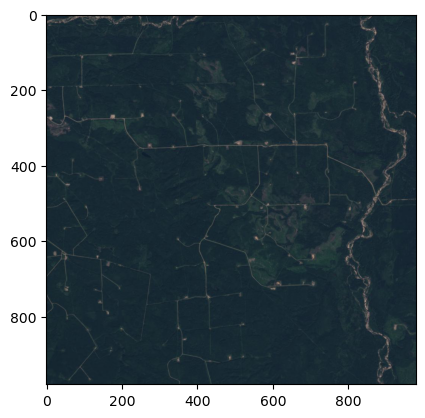

In [3]:
plt.imshow(image.permute(1, 2, 0))

In [4]:
forest_road_extractor = ForestRoadsExtractor(model_name='fcn', model_path='../models/fcn/fcn_exp4/fcn')

In [5]:
mask = forest_road_extractor.get_raw_roads(image_name)

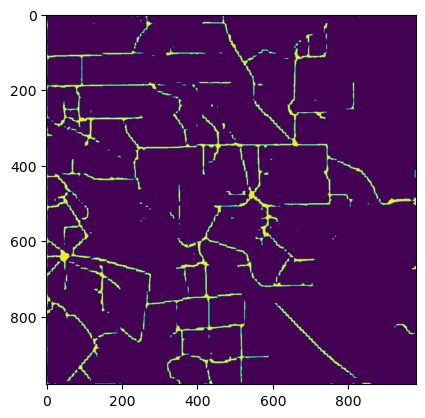

In [6]:
plt.imshow(mask)

In [7]:
mask, inds_coords, graph = forest_road_extractor.get_processed_roads(mask)

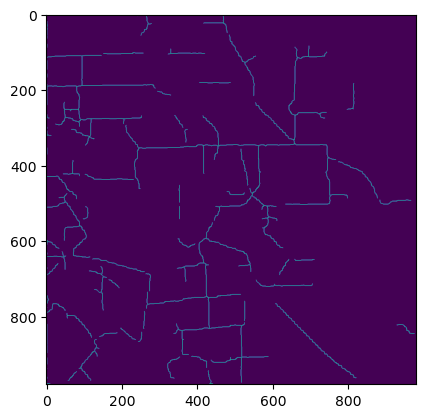

In [8]:
plt.imshow(mask)

In [9]:
coords = [(55.0357458233879, -115.39957774134791),
          (55.03462730853163, -115.24270633879782),
          (54.946566942606324, -115.242705),
          (54.94768545746259, -115.3995764025501)]
osm_file_path = './graph1.osm'

forest_road_extractor.get_osm_map(mask, inds_coords, graph, coords, osm_file_path)

In [15]:
# forest_road_extractor.build_osm_map(image_name, coords, osm_file_path)

In [16]:
G = ox.graph.graph_from_xml(osm_file_path, simplify=False, retain_all=True)
nodes, edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True)

In [17]:
nodes

y           x                     geometry
osmid                                                    
0      55.035460 -115.359560  POINT (-115.35956 55.03546)
1      55.035459 -115.359399  POINT (-115.35940 55.03546)
2      55.035458 -115.359239  POINT (-115.35924 55.03546)
93     55.035368 -115.359239  POINT (-115.35924 55.03537)
3      55.035457 -115.359079  POINT (-115.35908 55.03546)
...          ...         ...                          ...
11391  54.947277 -115.329625  POINT (-115.32962 54.94728)
11392  54.947275 -115.329464  POINT (-115.32946 54.94728)
11393  54.947274 -115.329304  POINT (-115.32930 54.94727)
11394  54.947273 -115.329144  POINT (-115.32914 54.94727)
11395  54.947272 -115.328984  POINT (-115.32898 54.94727)

[10576 rows x 3 columns]

In [18]:
edges

osmid  reversed  length  \
u     v     key                            
0     1     0        0     False  10.201   
1     2     0        1     False  10.201   
2     93    0        2     False   9.992   
      3     0        3     False  10.201   
93    131   0        4     False   9.992   
...                ...       ...     ...   
11389 11390 0    10525     False  10.223   
11391 11392 0    10526     False  10.223   
11392 11393 0    10527     False  10.223   
11393 11394 0    10528     False  10.223   
11394 11395 0    10529     False  10.223   

                                                          geometry  
u     v     key                                                     
0     1     0    LINESTRING (-115.35956 55.03546, -115.35940 55...  
1     2     0    LINESTRING (-115.35940 55.03546, -115.35924 55...  
2     93    0    LINESTRING (-115.35924 55.03546, -115.35924 55...  
      3     0    LINESTRING (-115.35924 55.03546, -115.35908 55...  
93    131   0    LINESTRING (-115.35924 55.03537, -115.35924 55...  
...                                                            ...  
11389 11390 0    LINESTRING (-115.32994 54.94728, -115.32978 54...  
11391 11392 0    LINESTRING (-115.32962 54.94728, -115.32946 54...  
11392 11393 0    LINESTRING (-115.32946 54.94728, -115.32930 54...  
11393 11394 0    LINESTRING (-115.32930 54.94727, -115.32914 54...  
11394 11395 0    LINESTRING (-115.32914 54.94727, -115.32898 54...  

[10530 rows x 4 columns]

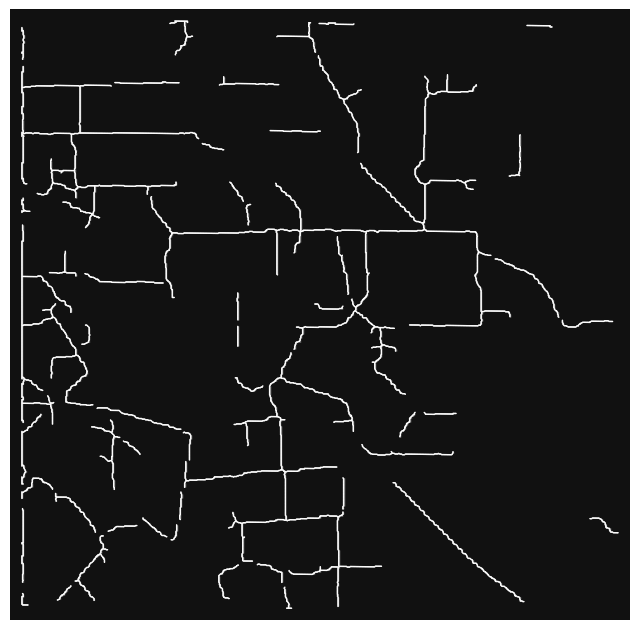

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [19]:
ox.plot.plot_graph(G, node_size=1)

In [20]:
ox.folium.plot_graph_folium(G)